## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
df_train = pd.read_csv("churn_train.csv")
df_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df_train.shape

(36992, 25)

In [4]:
df_train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
df_train.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [7]:
# handle missing data

# categorical features
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df_train[['region_category', 'preferred_offer_types']])
df_train[['region_category', 'preferred_offer_types']] = impute_mode.transform(df_train[['region_category', 'preferred_offer_types']])

# numerical features
impute_mean = SimpleImputer(strategy = 'mean')
impute_mean.fit(df_train[['points_in_wallet']])
df_train['points_in_wallet'] = impute_mean.transform(df_train[['points_in_wallet']])

In [8]:
df_train.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [17]:
!pip install pandas-profiling

     -------------------------------------- 324.4/324.4 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 353.0/353.0 kB 7.3 MB/s eta 0:00:00
     -------------------------------------- 153.3/153.3 kB 8.9 MB/s eta 0:00:00
     ---------------------------------------- 9.4/9.4 MB 997.4 kB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 663.5/663.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.3 MB/s eta 0:00:00
     ------------------------------------ 102.7/102.7 kB 739.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.2/4.2 MB 563.0 kB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 1.1 MB/s eta 0:00:00
     -------------------


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: c:\users\riish\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [18]:
from pandas_profiling import ProfileReport
report = ProfileReport(df_train)
report.to_file(output_file = "churn.html")

c:\users\riish\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\riish\AppData\Local\Temp\ipykernel_7456\3292726267.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.97it/s]


In [9]:
# high correlation reported in complaint_status and past_complaint
df_train[['complaint_status', 'past_complaint']].head()

,complaint_status,past_complaint
0,Not Applicable,No
1,Solved,Yes
2,Solved in Follow-up,Yes
3,Unsolved,Yes
4,Solved,Yes


In [10]:
df_train.drop('complaint_status', axis = 1, inplace = True)

In [11]:
df_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Poor Website,5


In [12]:
num_df = df_train.select_dtypes(include = np.number)

In [13]:
num_df.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.750000,2
1,32,16,306.34,12838.38,686.882199,1
2,44,14,516.16,21027.00,500.690000,5
3,37,11,53.27,25239.56,567.660000,5
4,31,20,113.13,24483.66,663.060000,5


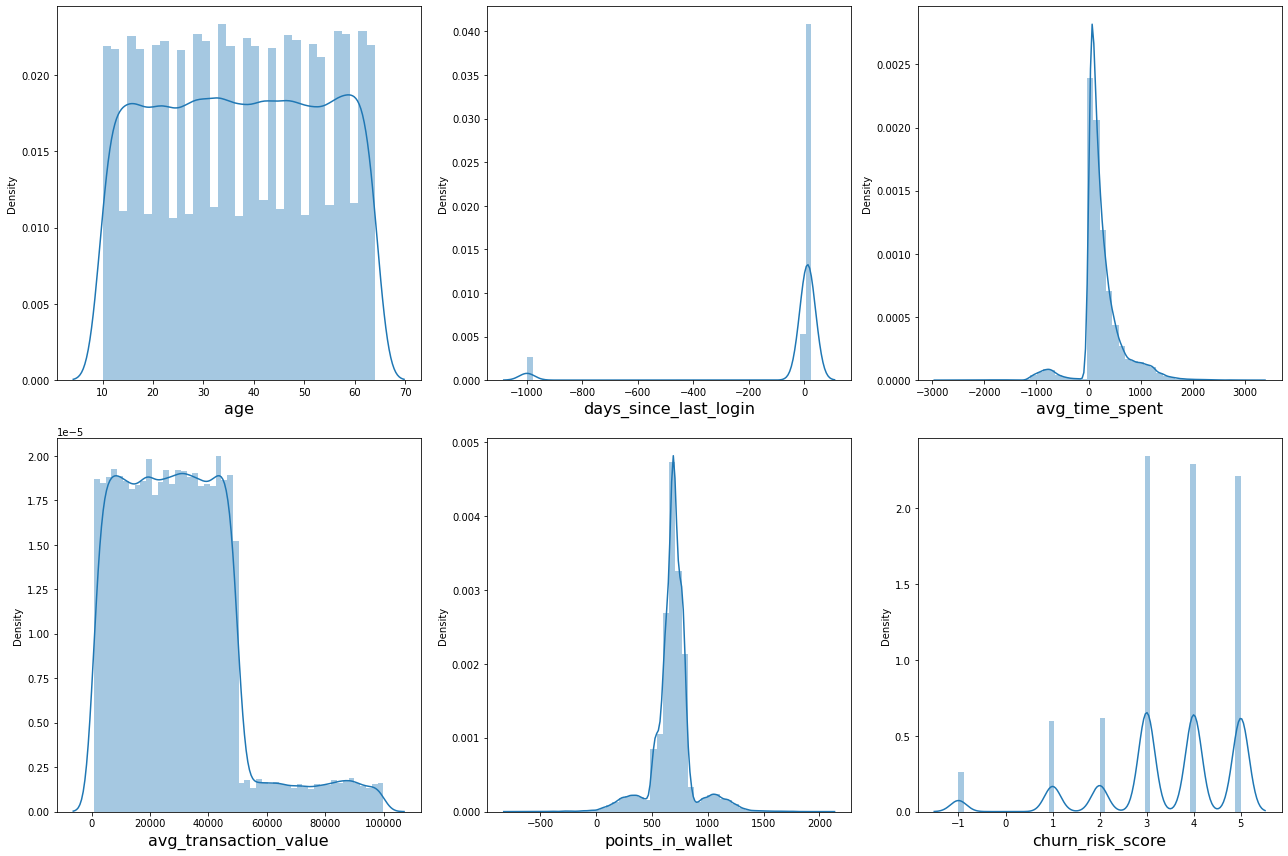

In [14]:
# visualize distribution of numerical features
plt.figure(figsize = (18, 12))

plot_num = 1
for feature in num_df:
    ax = plt.subplot(2, 3, plot_num)
    sns.distplot(num_df[feature])
    plt.xlabel(feature, fontsize = 16)
    plot_num += 1
    
plt.tight_layout()

In [15]:
df_train['joining_day'] = pd.to_datetime(df_train['joining_date'], format = "%Y/%m/%d").dt.day
df_train['joining_month'] = pd.to_datetime(df_train['joining_date'], format = "%Y/%m/%d").dt.month
df_train['joining_year'] = pd.to_datetime(df_train['joining_date'], format = "%Y/%m/%d").dt.year
df_train.drop('joining_date', axis = 1, inplace = True)

In [16]:
df_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,17.0,781.750000,Yes,Yes,No,Products always in Stock,2,17,8,2017
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1,28,8,2017
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,22.0,500.690000,No,Yes,Yes,Poor Website,5,11,11,2016
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,6.0,567.660000,No,Yes,Yes,Poor Website,5,29,10,2016
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,16.0,663.060000,No,Yes,Yes,Poor Website,5,12,9,2017


In [17]:
df_train[['last_visit_hour', 'last_visit_minute', 'last_visit_second']] = df_train['last_visit_time'].astype(str).str.split(':', expand = True).astype(int)
df_train.drop('last_visit_time', axis = 1, inplace = True)

In [18]:
df_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year,last_visit_hour,last_visit_minute,last_visit_second
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,Yes,No,Products always in Stock,2,17,8,2017,16,8,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,No,Yes,Quality Customer Care,1,28,8,2017,12,38,13
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,11,11,2016,22,53,21
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,29,10,2016,15,57,50
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,Yes,Yes,Poor Website,5,12,9,2017,15,46,44


In [19]:
df_train['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [20]:
gender = pd.get_dummies(df_train[['gender']], drop_first = True)
gender.head()

,gender_M,gender_Unknown
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [21]:
df_train['region_category'].value_counts()

Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64

In [22]:
region_category = pd.get_dummies(df_train[['region_category']], drop_first = True)
region_category.head()

,region_category_Town,region_category_Village
0,0,1
1,0,0
2,1,0
3,0,0
4,0,0


In [23]:
df_train['membership_category'].value_counts()

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

In [24]:
membership_category = pd.get_dummies(df_train[['membership_category']], drop_first = True)
membership_category.head()

,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [25]:
df_train['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [26]:
joined_through_referral = pd.get_dummies(df_train[['joined_through_referral']], drop_first = True)
joined_through_referral.head()

,joined_through_referral_No,joined_through_referral_Yes
0,1,0
1,0,0
2,0,1
3,0,1
4,1,0


In [27]:
df_train['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [28]:
preferred_offer_types = pd.get_dummies(df_train[['preferred_offer_types']], drop_first = True)
preferred_offer_types.head()

,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [29]:
df_train['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [30]:
medium_of_operation = pd.get_dummies(df_train[['medium_of_operation']], drop_first = True)
medium_of_operation.head()

,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [31]:
df_train['internet_option'].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

In [32]:
internet_option = pd.get_dummies(df_train[['internet_option']], drop_first = True)
internet_option.head()

,internet_option_Mobile_Data,internet_option_Wi-Fi
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [33]:
df_train['used_special_discount'].value_counts()

Yes    20342
No     16650
Name: used_special_discount, dtype: int64

In [34]:
used_special_discount = pd.get_dummies(df_train[['used_special_discount']], drop_first = True)
used_special_discount.head()

,used_special_discount_Yes
0,1
1,1
2,0
3,0
4,0


In [35]:
df_train['offer_application_preference'].value_counts()

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64

In [36]:
offer_application_preference = pd.get_dummies(df_train[['offer_application_preference']], drop_first = True)
offer_application_preference.head()

,offer_application_preference_Yes
0,1
1,0
2,1
3,1
4,1


In [37]:
df_train['past_complaint'].value_counts()

No     18602
Yes    18390
Name: past_complaint, dtype: int64

In [38]:
past_complaint = pd.get_dummies(df_train[['past_complaint']], drop_first = True)
past_complaint.head()

,past_complaint_Yes
0,0
1,1
2,1
3,1
4,1


In [39]:
df_train['feedback'].value_counts()

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64

In [40]:
feedback = pd.get_dummies(df_train[['feedback']], drop_first = True)
feedback.head()

,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [41]:
df_train_new = pd.concat([df_train, gender, region_category, membership_category, joined_through_referral, preferred_offer_types, medium_of_operation, internet_option, used_special_discount, offer_application_preference, past_complaint, feedback], axis = 1)
df_train_new.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,1,0,0,0,0,1,0,0,0,0
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,0,1,0,0,0,0,1,0,0,0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,1,1,0,0,1,0,0,0,0,0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,1,1,0,0,1,0,0,0,0,0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,1,1,0,0,1,0,0,0,0,0


In [42]:
df_train_new.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_hour', 'last_visit_minute',
       'last_visit_second', 'gender_M', 'gender_Unknown',
       'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
      

In [43]:
df_train_new.drop(['customer_id', 'Name', 'gender', 'security_no', 'region_category', 'membership_category', 
                   'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 
                  'internet_option', 'avg_frequency_login_days', 'used_special_discount', 'offer_application_preference', 
                  'past_complaint', 'feedback'], axis = 1, inplace = True)
df_train_new.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [44]:
df_train_new.shape

(36992, 41)

In [45]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          36992 non-null  int64  
 1   days_since_last_login                        36992 non-null  int64  
 2   avg_time_spent                               36992 non-null  float64
 3   avg_transaction_value                        36992 non-null  float64
 4   points_in_wallet                             36992 non-null  float64
 5   churn_risk_score                             36992 non-null  int64  
 6   joining_day                                  36992 non-null  int64  
 7   joining_month                                36992 non-null  int64  
 8   joining_year                                 36992 non-null  int64  
 9   last_visit_hour                              36992 non-null  int32  
 10

In [46]:
df_test = pd.read_csv("churn_test.csv")
df_test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [47]:
df_test.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 2948
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            159
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                1963
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [48]:
# handle missing data

# categorical features
impute_mode.fit(df_test[['region_category', 'preferred_offer_types']])
df_test[['region_category', 'preferred_offer_types']] = impute_mode.transform(df_test[['region_category', 'preferred_offer_types']])

# numerical features
impute_mean.fit(df_test[['points_in_wallet']])
df_test['points_in_wallet'] = impute_mean.transform(df_test[['points_in_wallet']])

In [49]:
df_test.drop('complaint_status', axis = 1, inplace = True)

In [50]:
df_test['joining_day'] = pd.to_datetime(df_test['joining_date'], format = "%Y/%m/%d").dt.day
df_test['joining_month'] = pd.to_datetime(df_test['joining_date'], format = "%Y/%m/%d").dt.month
df_test['joining_year'] = pd.to_datetime(df_test['joining_date'], format = "%Y/%m/%d").dt.year
df_test.drop('joining_date', axis = 1, inplace = True)

In [51]:
df_test[['last_visit_hour', 'last_visit_minute', 'last_visit_second']] = df_test['last_visit_time'].astype(str).str.split(':', expand = True).astype(int)
df_test.drop('last_visit_time', axis = 1, inplace = True)

In [52]:
gender = pd.get_dummies(df_train[['gender']], drop_first = True)
region_category = pd.get_dummies(df_train[['region_category']], drop_first = True)
membership_category = pd.get_dummies(df_train[['membership_category']], drop_first = True)
joined_through_referral = pd.get_dummies(df_train[['joined_through_referral']], drop_first = True)
preferred_offer_types = pd.get_dummies(df_train[['preferred_offer_types']], drop_first = True)
medium_of_operation = pd.get_dummies(df_train[['medium_of_operation']], drop_first = True)
internet_option = pd.get_dummies(df_train[['internet_option']], drop_first = True)
used_special_discount = pd.get_dummies(df_train[['used_special_discount']], drop_first = True)
offer_application_preference = pd.get_dummies(df_train[['offer_application_preference']], drop_first = True)
past_complaint = pd.get_dummies(df_train[['past_complaint']], drop_first = True)
feedback = pd.get_dummies(df_train[['feedback']], drop_first = True)

df_test_new = pd.concat([df_test, gender, region_category, membership_category, joined_through_referral, preferred_offer_types, medium_of_operation, internet_option, used_special_discount, offer_application_preference, past_complaint, feedback], axis = 1)
df_test_new.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe43004900440031003700300030003400,Alethia Meints,50.0,F,OQJ1XAY,Village,Premium Membership,No,xxxxxxxx,Without Offers,...,1,0,0,0,0,1,0,0,0,0
1,fffe43004900440031003900370037003300,Ming Lopez,41.0,M,OUQRPKO,Village,Gold Membership,No,xxxxxxxx,Without Offers,...,0,1,0,0,0,0,1,0,0,0
2,fffe43004900440034003800360037003000,Carina Flannigan,31.0,F,02J2RE7,Town,Silver Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,1,1,0,0,1,0,0,0,0,0
3,fffe43004900440036003200370033003400,Kyung Wanner,64.0,M,5YEQIF1,Town,Silver Membership,Yes,CID8941,Credit/Debit Card Offers,...,1,1,0,0,1,0,0,0,0,0
4,fffe43004900440035003000370031003900,Enola Gatto,16.0,F,100RYB5,Town,No Membership,Yes,CID5690,Without Offers,...,1,1,0,0,1,0,0,0,0,0


In [53]:
df_test_new.drop(['customer_id', 'Name', 'gender', 'security_no', 'region_category', 'membership_category', 
                   'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 
                  'internet_option', 'avg_frequency_login_days', 'used_special_discount', 'offer_application_preference', 
                  'past_complaint', 'feedback'], axis = 1, inplace = True)
df_test_new.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_hour,last_visit_minute,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,50.0,12.0,386.26,40721.44,733.830000,2.0,11.0,2015.0,7.0,19.0,...,1,0,0,0,0,1,0,0,0,0
1,41.0,11.0,37.80,9644.40,726.000000,1.0,3.0,2016.0,22.0,21.0,...,0,1,0,0,0,0,1,0,0,0
2,31.0,18.0,215.36,3693.25,713.780000,3.0,3.0,2017.0,16.0,40.0,...,1,1,0,0,1,0,0,0,0,0
3,64.0,-999.0,44.57,36809.56,744.970000,18.0,8.0,2017.0,14.0,56.0,...,1,1,0,0,1,0,0,0,0,0
4,16.0,6.0,349.88,40675.86,299.048351,5.0,5.0,2015.0,2.0,57.0,...,1,1,0,0,1,0,0,0,0,0


In [54]:
X = df_train_new.drop(['churn_risk_score'], axis = 1)
X.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_hour,last_visit_minute,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,17,8,2017,16,8,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,686.882199,28,8,2017,12,38,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,11,11,2016,22,53,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,29,10,2016,15,57,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,12,9,2017,15,46,...,1,1,0,0,1,0,0,0,0,0


In [55]:
y = df_train_new['churn_risk_score']
y.head()

0    2
1    1
2    5
3    5
4    5
Name: churn_risk_score, dtype: int64

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
feat_sel = ExtraTreesRegressor()
feat_sel.fit(X, y)

ExtraTreesRegressor()

In [57]:
feat_sel.feature_importances_

array([0.02412162, 0.02107415, 0.02512596, 0.07496049, 0.05895131,
       0.02394877, 0.02290356, 0.01414687, 0.02328398, 0.02410502,
       0.02473374, 0.0098056 , 0.00030373, 0.01079154, 0.00713598,
       0.03160632, 0.13743448, 0.03887485, 0.03133008, 0.05703758,
       0.00837647, 0.0093358 , 0.00994111, 0.01000242, 0.00614681,
       0.00851358, 0.00845334, 0.0088425 , 0.00993801, 0.00814929,
       0.00710108, 0.01148473, 0.00833519, 0.00801756, 0.00718314,
       0.0511701 , 0.05482007, 0.0470313 , 0.00773343, 0.04774844])

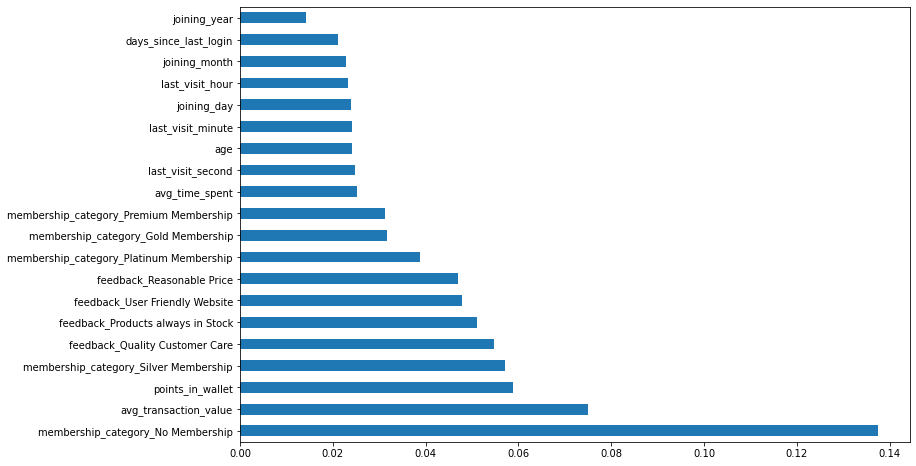

In [58]:
#visualizing feature importances
plt.figure(figsize = (12, 8))
feat_imp = pd.Series(feat_sel.feature_importances_, index = X.columns)
feat_imp.nlargest(20).plot(kind = 'barh')
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [60]:
X_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_hour,last_visit_minute,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
4218,12,11,48.95,61130.83,841.040000,25,2,2015,6,30,...,0,1,0,0,0,1,0,0,0,0
25030,11,7,221.32,6079.76,545.750000,23,6,2016,19,10,...,0,0,0,0,0,0,0,0,1,0
3665,26,22,40.04,15875.07,618.330000,26,5,2017,18,7,...,0,0,0,0,0,0,0,0,1,0
17256,38,21,122.12,21442.17,686.882199,15,1,2016,4,26,...,0,0,0,0,1,0,0,0,0,0
27908,53,-999,1014.73,83142.29,702.830000,27,5,2016,3,19,...,1,1,0,0,0,0,0,1,0,0


In [61]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29593, 40) (7399, 40) (29593,) (7399,)


In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [73]:
# evaluating and comparing models
print("*" * 10, "ACCURACIES", "*" * 10)
print("Decision Tree: ", dt.score(X_test, y_test)*100, "%")
print("Random Forest: ", rf.score(X_test, y_test)*100, "%")
print("Histogram-based Gradient Boosting: ", hgb.score(X_test, y_test)*100, "%")

********** ACCURACIES **********
Decision Tree:  70.84741181240707 %
Random Forest:  75.46965806190026 %
Histogram-based Gradient Boosting:  75.30747398297068 %


In [74]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 10, 20]
}

cv = RandomizedSearchCV(RandomForestClassifier(), param_grid, verbose = 3)

In [75]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.669 total time=   1.0s
[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.659 total time=   1.0s
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.660 total time=   0.9s
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.665 total time=   0.9s
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.639 total time=   1.1s
[CV 1/5] END ......max_depth=3, n_estimators=50;, score=0.661 total time=   0.4s
[CV 2/5] END ......max_depth=3, n_estimators=50;, score=0.646 total time=   0.4s
[CV 3/5] END ......max_depth=3, n_estimators=50;, score=0.665 total time=   0.5s
[CV 4/5] END ......max_depth=3, n_estimators=50;, score=0.663 total time=   0.4s
[CV 5/5] END ......max_depth=3, n_estimators=50;, score=0.673 total time=   0.4s
[CV 1/5] END ......max_depth=5, n_estimators=50;, score=0.683 total time=   0.6s
[CV 2/5] END ......max_depth=5, n_estimators=50;

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [50, 100, 150, 200]},
                   verbose=3)

In [76]:
cv.best_params_

{'n_estimators': 200, 'max_depth': 20}

In [77]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 20)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [ ]:
print("Accuracy: ", rf.score(X_test, y_test)*100, "%")


Accuracy:  75.95621029868902 %


## Save Model

In [79]:
import pickle as pkl
file = "model.pkl"
pkl.dump(rf, open(file, 'wb'))

In [80]:
load_model = pkl.load(open(file, 'rb'))

In [88]:
y_pred = load_model.predict(X_test)

In [90]:
y_pred

array([4, 1, 5, ..., 1, 5, 3], dtype=int64)